Wines project:

First, I extracted data from the kaggle website on wine components, and wine quality.

In [904]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random


In [141]:
!pip install kaggle


I used api to get all my data

In [905]:
api=KaggleApi()
api.authenticate()

Obtaining data on red wine:

In [572]:
api.dataset_download_file('uciml/red-wine-quality-cortez-et-al-2009',
                         file_name='winequality-red.csv')

False

Obtaining data on white wine:

In [159]:
api.dataset_download_file('piyushagni5/white-wine-quality',
                         file_name='winequality-white.csv')

False

I entered the information I received into the dataframe

In [906]:
df_red=pd.read_csv('winequality-red.csv')
df_red['color'] = 'red'

In [907]:
df_white = pd.read_csv(r'winequality-white.csv', sep=';')
df_white['color'] = 'white'

In [908]:
df_total=pd.concat([df_red, df_white], ignore_index=True)
df_2=df_total.copy()
df_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


I was given a table of 13 different categories on wine ingredients.
The table in size [6497 rows x 13 columns].

Details of the criteria obtained:
fixed acidity (tartaric acid - g/dm3)-
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
volatile acidity (acetic acid - g/dm3)-
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
citric acid (g/dm3)-
found in small quantities, citric acid can add ‘freshness’ and flavor to wines
residual sugar (g/dm3)-
the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
chlorides (sodium chloride - g/dm3)-
the amount of salt in the wine
free sulfur dioxide (mg/dm3)-
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
total sulfur dioxide (mg/dm3)-
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
density (g/cm3)-
the density of water is close to that of water depending on the percent alcohol and sugar content
pH-
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
sulphates (potassium sulphate - g/dm3)-
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
alcohol (% by volume)-
the percent alcohol content of the wine
color -type of wine

I turned the variable - the type of wine into a numerical variable

In [909]:

df_total['color_nor'] = pd.factorize(df_total['color'])[0]
del df_total['color']
df_total

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_nor
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


I checked to see if I had any columns or missing data

In [910]:
Sum = df_total.isnull().sum()

pd.concat([Sum], axis =1, keys= ['Sum'])

,Sum
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


After seeing that there is no missing data I checked if there is any unusual data

In [911]:
df_total.describe(percentiles=None, include=None, exclude=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_nor
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


I have seen that there are some data that seem like exceptional data

C:\Users\lior1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

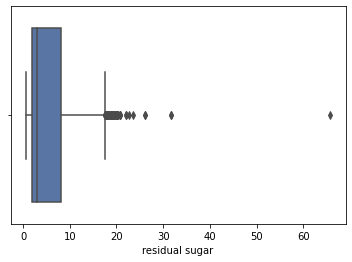

In [544]:
sns.boxplot (df_total ['residual sugar'])

C:\Users\lior1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

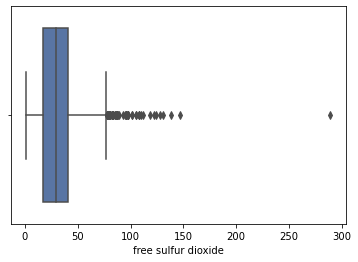

In [545]:
sns.boxplot (df_total ['free sulfur dioxide'])

C:\Users\lior1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

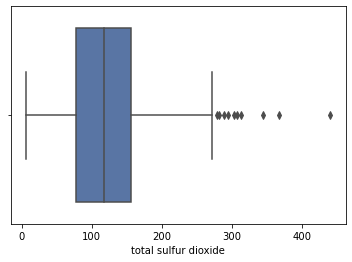

In [546]:
df_new = df.rename(columns={'A': 'Col_1'}, index={'ONE': 'Row_1'})sns.boxplot (df_total ['total sulfur dioxide'])

Handling missing data:

In [794]:
pd.options.mode.chained_assignment = None 

In [917]:
df_white.describe(percentiles=None, include=None, exclude=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [936]:
df_white_1=df_white.copy()
df_white=df_white_1.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'})
df_white.total_sulfur_dioxide[df_white.total_sulfur_dioxide>180]=np.nan
df_white["total_sulfur_dioxide"].describe()

df_white=df_white_1.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'})
df_white.free_sulfur_dioxide[df_white.free_sulfur_dioxide>48]=np.nan
df_white["free_sulfur_dioxide"].describe()

df_white=df_white_1.rename(columns={'residual sugar': 'residual_sugar'})
df_white.residual_sugar[df_white.residual_sugar>10]=np.nan
df_white["residual_sugar"].describe()

df_white.dropna(axis=0,how="any")

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [919]:
df_red.describe(percentiles=None, include=None, exclude=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [931]:
df_red_1=df_red.copy()
df_red=df_red_1.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'})
df_red.total_sulfur_dioxide[df_red.total_sulfur_dioxide>80]=np.nan
df_red["total_sulfur_dioxide"].describe()
df_red=df_red.dropna(axis=0,how="any")

In [921]:
df_total.describe(percentiles=None, include=None, exclude=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_nor
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [925]:
df_total_1=df_total.copy()
df__=df_total_1.rename(columns={'residual sugar': 'residual_sugar'})
df__.residual_sugar[df__.residual_sugar>10]=np.nan
df__["residual_sugar"].describe()


count    5293.000000
mean        3.547808
std         2.503712
min         0.600000
25%         1.700000
50%         2.350000
75%         5.200000
max        10.000000
Name: residual_sugar, dtype: float64

In [926]:
df__=df_total_1.rename(columns={'free sulfur dioxide': 'free_sulfur_dioxide'})
df__.free_sulfur_dioxide[df__.free_sulfur_dioxide>48]=np.nan
df__["free_sulfur_dioxide"].describe()


count    5458.000000
mean       24.985617
std        12.188404
min         1.000000
25%        15.000000
50%        25.000000
75%        35.000000
max        48.000000
Name: free_sulfur_dioxide, dtype: float64

In [927]:
df__=df_total_1.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide'})
df__.total_sulfur_dioxide[df__.total_sulfur_dioxide>171]=np.nan
df__["total_sulfur_dioxide"].describe()


count    5407.000000
mean       99.124468
std        45.605606
min         6.000000
25%        65.000000
50%       108.000000
75%       135.000000
max       171.000000
Name: total_sulfur_dioxide, dtype: float64

In [928]:
df_without_miss=df__.dropna(axis=0,how="any")
df_without_miss

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_nor
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


normalized the data using the normalize function

In [779]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value == min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [708]:
df_normal=normalize(df_total)
df_normal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_nor
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0


<AxesSubplot:>

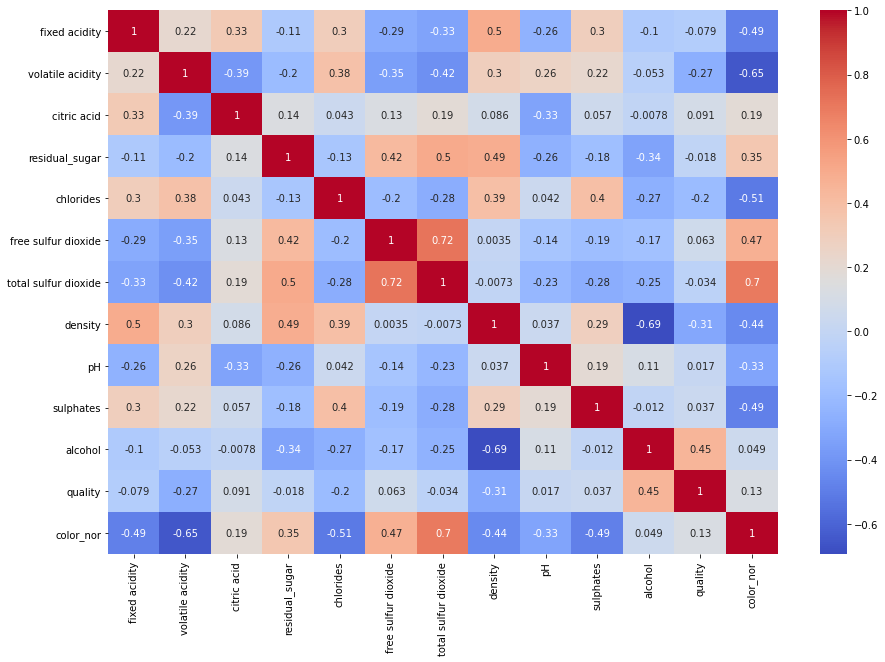

In [841]:
plt.subplots (figsize = (15, 10)) 
sns.heatmap (df_without_miss.corr (), annot = True, cmap = 'coolwarm')

I presented each variable in a single graph to see its quantity and ratio

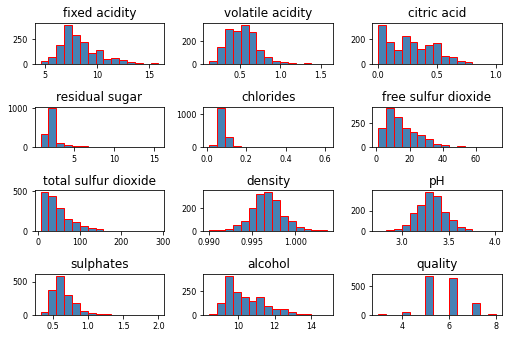

In [734]:
df_red.hist(bins=15, color='steelblue', edgecolor='red', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

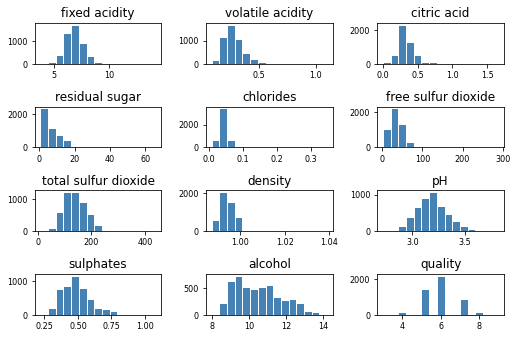

In [551]:
df_white.hist(bins=15, color='steelblue', edgecolor='white', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

I wanted to understand the difference in the acidity category, I wanted to understand where the hp level is greater - in red wine or white wine?

Text(0, 0.5, 'count')

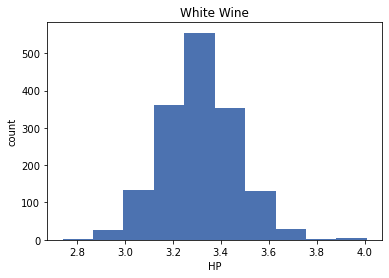

In [552]:
Ph_red_df = df_red.loc[:, ["pH"]]
Ph_red_df = Ph_red_df.rename(columns={'pH': 'pH_R'})
Ph_red_df.plot(kind="hist",legend=False).set_title("White Wine")
plt.xlabel("HP")
plt.ylabel("count")

Text(0, 0.5, 'count')

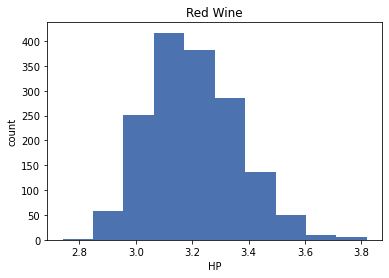

In [506]:
Ph_white_df = df_white.loc[:, ["pH"]]
Ph_white_df_part = Ph_white_df.iloc[:1599]
Ph_white_df_part = Ph_white_df_part.rename(columns={'pH': 'pH_W'})
Ph_white_df_part.plot(kind="hist",legend=False).set_title("Red Wine")
plt.xlabel("HP")
plt.ylabel("count")

A union of the two in order to compare

Text(0, 0.5, 'count')

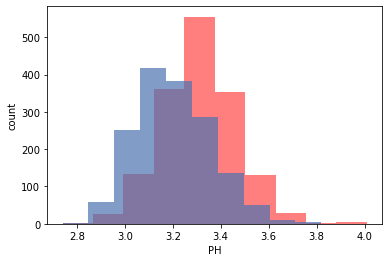

In [553]:

plt.hist(Ph_red_df["pH_R"], alpha=0.5,color="red")
plt.hist(Ph_white_df_part["pH_W"], alpha=0.7)
plt.xlabel("PH")
plt.ylabel("count")


A similar comparison will be made and we will check where the sugar level is higher

Text(0, 0.5, 'count')

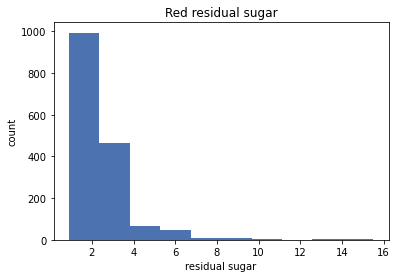

In [504]:
sugar_red_df = df_red.loc[:, ["residual sugar"]]
sugar_red_df = sugar_red_df.rename(columns={'residual sugar': 'residual sugar_R'})
sugar_red_df.plot(kind="hist",legend=False).set_title("Red residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("count")

Text(0, 0.5, 'count')

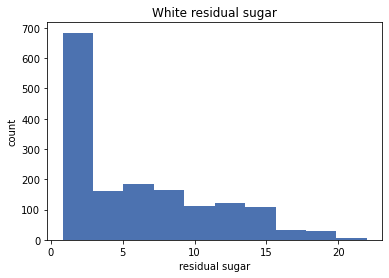

In [503]:
sugar_white_df = df_white.loc[:, ["residual sugar"]]
sugar_white_df_part = sugar_white_df.iloc[:1599]
sugar_white_df_part = sugar_white_df_part.rename(columns={'residual sugar': 'residual sugar_W'})
sugar_white_df_part.plot(kind="hist",legend=False).set_title("White residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("count")

Text(0, 0.5, 'count')

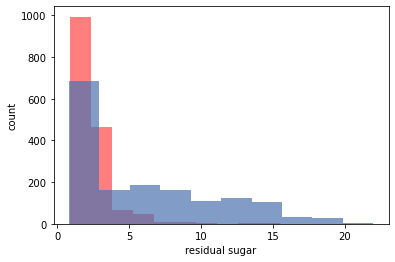

In [502]:
plt.hist(sugar_red_df["residual sugar_R"], alpha=0.5,color="red")
plt.hist(sugar_white_df_part["residual sugar_W"], alpha=0.7)
plt.xlabel("residual sugar")
plt.ylabel("count")

We will also check which wine with a higher density

Text(0, 0.5, 'count')

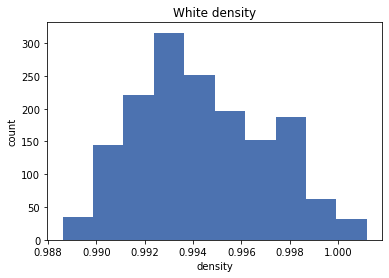

In [513]:
density_white_df = df_white.loc[:, ["density"]]
density_white_df_part = density_white_df.iloc[:1599]
density_white_df_part = density_white_df_part.rename(columns={'density': 'density_W'})
density_white_df_part.plot(kind="hist",legend=False).set_title("White density")
plt.xlabel("density")
plt.ylabel("count")

Text(0, 0.5, 'count')

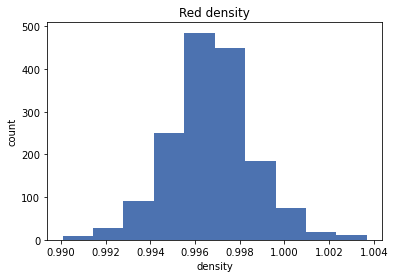

In [515]:
density_red_df = df_red.loc[:, ["density"]]  
density_red_df = density_red_df.rename(columns={'density': 'density_R'})
density_red_df.plot(kind="hist",legend=False).set_title("Red density")
plt.xlabel("density")
plt.ylabel("count")

Text(0, 0.5, 'count')

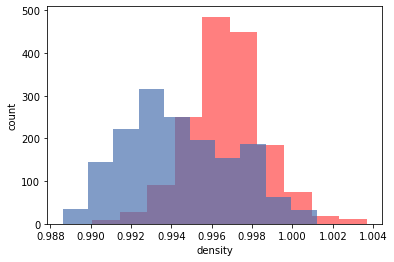

In [519]:
plt.hist(density_red_df["density_R"], alpha=0.5,color="red")
plt.hist(density_white_df_part["density_W"], alpha=0.7)
plt.xlabel("density")
plt.ylabel("count")

Graphical representation of the relationship between taste quality and alcohol percentage

In [613]:

df_total['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Text(0, 0.5, 'Wine Alcohol %')

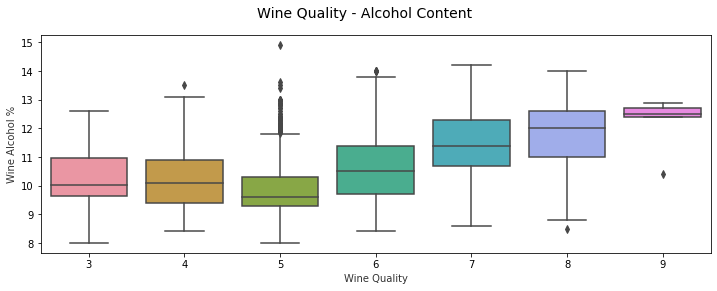

In [806]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=df_without_miss, ax=ax)
ax.set_xlabel("Wine Quality",alpha=0.8)
ax.set_ylabel("Wine Alcohol %",alpha=0.8)

You can see here the ratio between 2 variables

C:\Users\lior1\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


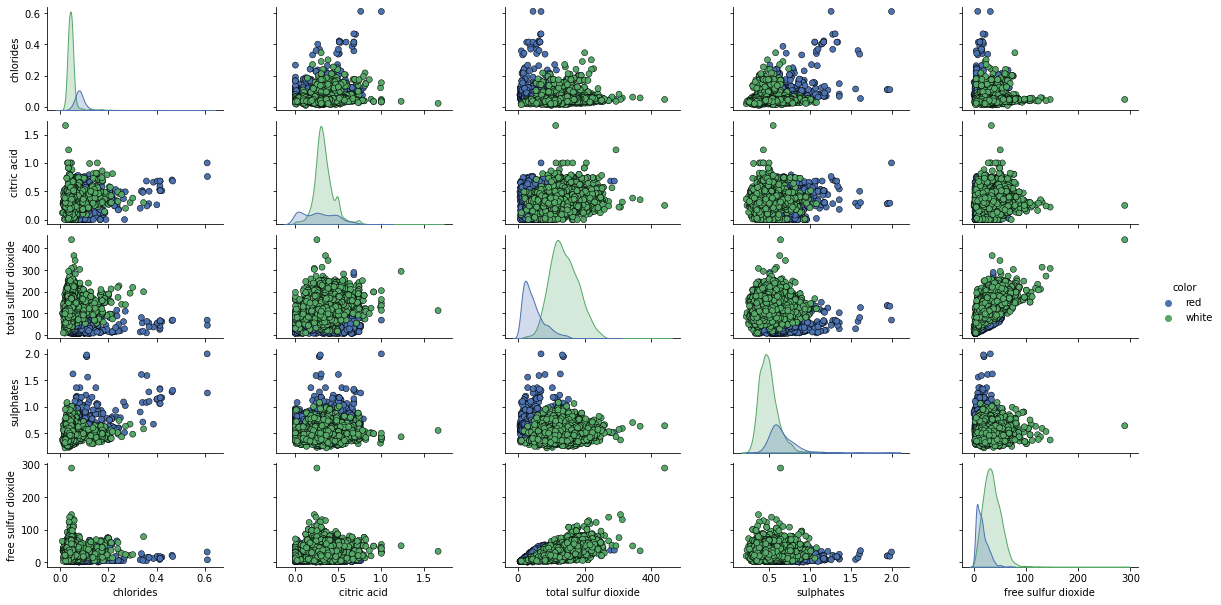

In [561]:
cols = ['chlorides', 'citric acid', 'total sulfur dioxide', 'sulphates', 'color','free sulfur dioxide']
pp = sns.pairplot(df_2[cols],hue='color', size=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)


We want to try to predict the taste rating of the wine according to the data on the wine. We will try to do this with the help of knn and we will see the success rates.

In [811]:
df_total_copy=df_without_miss.copy()
new_frame = df_total_copy.loc[:, "quality"]
df_x=df_total_copy.drop(columns='quality')
new_frame_copy = new_frame.copy()
new_frame = new_frame.replace([3,4],0)
new_frame= new_frame.replace([5,6],1)
new_frame = new_frame.replace([7,8,9],2)
x = np.array(df_x)
y = np.array(new_frame)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [812]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
result=[]
k = [2,3,5,7,8]
for i in k:
    wine = KNeighborsClassifier(n_neighbors=i)
    wine.fit(x_train, y_train)
    y_pred=wine.predict(x_test)

    
    print(i)

    print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred)*100)
    j=metrics.accuracy_score(y_true = y_test, y_pred = y_pred)*100
    result.append(j)
    
   

2
Accuracy =  75.05919494869772
3
Accuracy =  74.58563535911603
5
Accuracy =  76.08524072612471
7
Accuracy =  76.55880031570639
8
Accuracy =  77.34806629834254


In [813]:
best_k=['k' , 'result']
list_of_tuples = list(zip(k, result))
df_best_k = pd.DataFrame(list_of_tuples, columns = ['k', 'result']) 
print(df_best_k)

   k     result
0  2  75.059195
1  3  74.585635
2  5  76.085241
3  7  76.558800
4  8  77.348066


Text(0, 0.5, 'result')

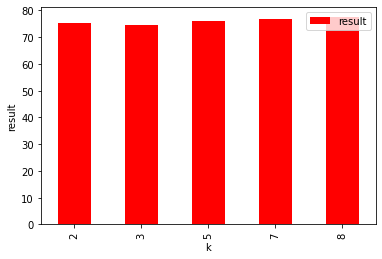

In [814]:
df_best_k.plot(kind="bar",x='k',y='result', color='red')
plt.xlabel('k')
plt.ylabel('result')

In [815]:
def minMaxNormalize(arrayOfVectors, testVectors):
    featureNumber = len(arrayOfVectors[0, :])
    newMax = 1
    newMin = 0
    for i in range(0, featureNumber):
        maxVal = max(arrayOfVectors[:, i])
        minVal = min(arrayOfVectors[:, i])
        diff = maxVal - minVal
        if diff == 0:
            diff = 1
        arrayOfVectors[:, i] = (arrayOfVectors[:, i] - minVal) / diff
        testVectors[:, i] = (testVectors[:, i] - minVal) / diff
        newDiff = newMax - newMin
        arrayOfVectors[:, i] = arrayOfVectors[:, i] * newDiff + newMin
        testVectors[:, i] = testVectors[:, i] * newDiff + newMin

In [816]:

def perceptronAlgorithm(trainingSet, labels, testSet):
 
    numOfFeature = len(trainingSet[0, :])
    arrayOfWeights = []
    w0 = np.random.uniform(low=0.0, high=1.0, size=(numOfFeature,))
    w1 = np.random.uniform(low=0.0, high=1.0, size=(numOfFeature,))
    w2 = np.random.uniform(low=0.0, high=1.0, size=(numOfFeature,))
    arrayOfWeights.append(w0)
    arrayOfWeights.append(w1)
    arrayOfWeights.append(w2)
    arrayOfWeights = np.asarray(arrayOfWeights)

    epochs = 60
    eta = 0.005
    for e in range(epochs):
      
        shuffleList = list(zip(trainingSet, labels))
        random.shuffle(shuffleList)
        trainingSet, labels = zip(*shuffleList)
      
        for x, y in zip(trainingSet, labels):
            y_hat = np.argmax(np.dot(arrayOfWeights, x))
            
            if y != str(y_hat):
                arrayOfWeights[int(y), :] = arrayOfWeights[int(y), :] + np.multiply(eta, x)
                arrayOfWeights[y_hat, :] = arrayOfWeights[y_hat, :] - np.multiply(eta, x)

  
    perceptronPrediction = []
    for test in testSet:
        perceptronPrediction.append(np.argmax(np.dot(arrayOfWeights, test)))

    return perceptronPrediction

In [819]:
minMaxNormalize(x_train, x_test)
perceptron_result=perceptronAlgorithm(x_train,y_train,x_test)

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred =perceptron_result )*100)

Accuracy =  46.150809317015394


LOGISTIC REGRESSION

In [821]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.400)
reg = LogisticRegression(solver='lbfgs',max_iter=6497)
reg.fit(x_train,y_train)
y_hat = reg.predict(x_test)
acc = metrics.accuracy_score(y_hat,y_test)*100
acc

76.19423608369522